<a href="https://colab.research.google.com/github/LizQin/sstvars_DY/blob/main/HERDing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Now let's create the plot using the provided data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

input_csv = '/content/drive/My Drive/HF/HF_beta.csv'
# 加载CSV文件
data = pd.read_csv(input_csv)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


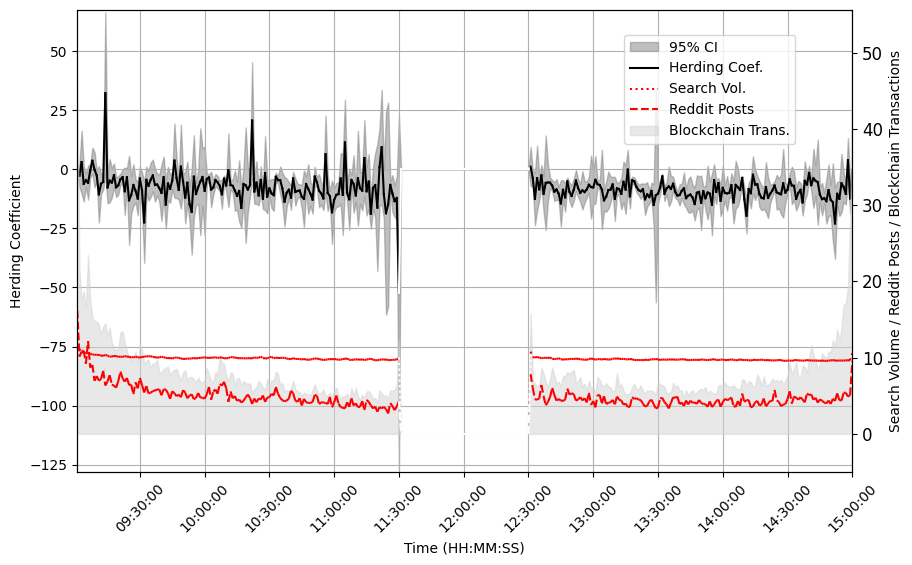

In [ ]:
# We will now modify the plot to change the line color to white if the value is zero.
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV file from Google Drive
input_csv = '/content/drive/My Drive/HF/HF_beta.csv'
data = pd.read_csv(input_csv)

# Convert 'Time' to HH:MM:SS format
def convert_time(time_value):
    hours = time_value // 10000
    minutes = (time_value % 10000) // 100
    seconds = time_value % 100
    return f"{hours:02}:{minutes:02}:{seconds:02}"

# Extract the columns from the dataframe
time_labels = data['Time'].apply(convert_time).values  # Convert the 'Time' column to HH:MM:SS format
herding_coef = data['Herding Coef.'].values
conf_lower = data['ci_lower'].values
conf_upper = data['ci_upper'].values
search_vol = data['Search Vol.'].values
reddit_posts = data['Reddit Posts'].values
blockchain_trans = data['Blockchain Trans.'].values

# Convert time_labels to minutes for the 30-minute interval selection
time_minutes = [int(t[:2]) * 60 + int(t[3:5]) for t in time_labels]  # Convert HH:MM:SS to total minutes
time_indices_30min = [i for i, minute in enumerate(time_minutes) if minute % 30 == 0]  # Get indices divisible by 30

# Define the function to plot lines with color change if the value is zero
def plot_with_color_change(ax, time_labels, values, line_color, zero_color='white', label=None, style='-', linewidth=1.5):
    # Loop through the values and plot with the specified colors
    for i in range(len(values) - 1):
        color = line_color if values[i] != 0 and values[i + 1] != 0 else zero_color
        ax.plot(time_labels[i:i+2], values[i:i+2], style, color=color, linewidth=linewidth, label=label if i == 0 else None)

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the 95% confidence interval for the herding coefficient
ax1.fill_between(time_labels, conf_lower, conf_upper, color='gray', alpha=0.5, label='95% CI')

# Plot the herding coefficient with color change for zero values
plot_with_color_change(ax1, time_labels, herding_coef, line_color='black', label='Herding Coef.')

# Customize x and y axis labels for the first y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Herding Coefficient')
ax1.set_xlim([0, len(data)-1])
ax1.set_ylim([min(conf_lower) - 1, max(conf_upper) + 1])

# Create a second y-axis for the search volume, Reddit posts, and blockchain transactions
ax2 = ax1.twinx()  # Secondary y-axis sharing the same x-axis

# Plot the search volume with color change for zero values
plot_with_color_change(ax2, time_labels, search_vol, line_color='red', style=':', label='Search Vol.')

# Plot Reddit posts with color change for zero values
plot_with_color_change(ax2, time_labels, reddit_posts, line_color='red', style='--', label='Reddit Posts')

# Plot blockchain transactions as light gray shaded area
ax2.fill_between(time_labels, blockchain_trans, np.min(blockchain_trans), color='lightgray', alpha=0.5, label='Blockchain Trans.')

# Customize y-axis for the second axis
ax2.set_ylabel('Search Volume / Reddit Posts / Blockchain Transactions')
ax2.set_ylim([min(blockchain_trans) - 5, max(blockchain_trans) + 5])

# Set x-axis ticks to show only every 30 minutes
ax1.set_xticks(time_labels[time_indices_30min])  # Show only labels at 30 minute intervals
ax1.set_xticklabels([time_labels[i] for i in time_indices_30min], rotation=45)

# Add legends for both axes
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

# Add grid and other visual enhancements
ax1.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Show the plot
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


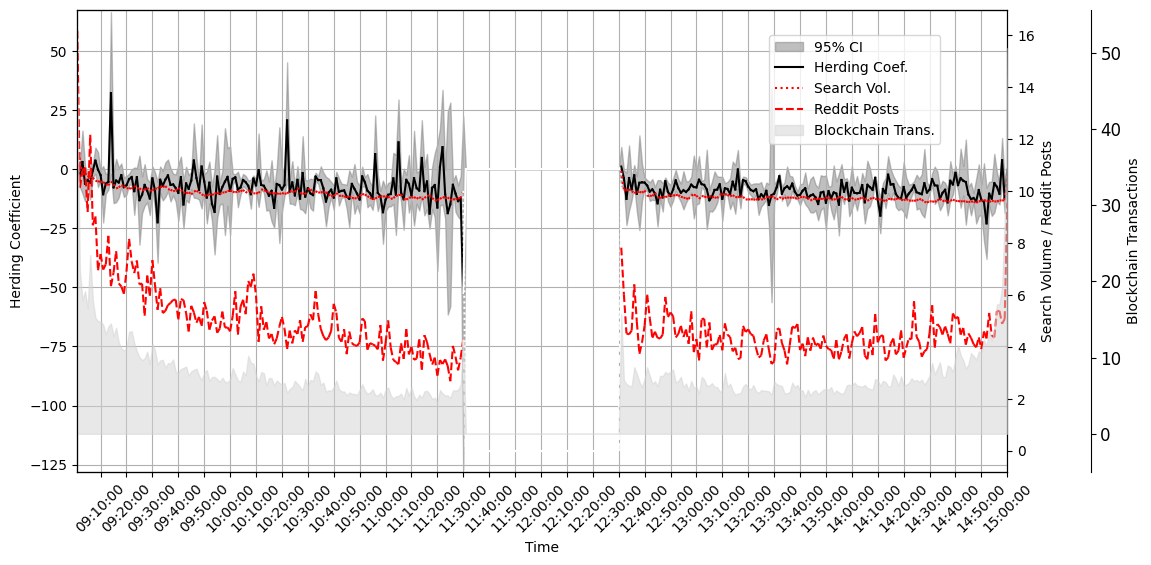

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV file from Google Drive
input_csv = '/content/drive/My Drive/HF/HF_beta.csv'
data = pd.read_csv(input_csv)

# Convert 'Time' to HH:MM:SS format
def convert_time(time_value):
    hours = time_value // 10000
    minutes = (time_value % 10000) // 100
    seconds = time_value % 100
    return f"{hours:02}:{minutes:02}:{seconds:02}"

# Extract the columns from the dataframe
time_labels = data['Time'].apply(convert_time).values  # Convert the 'Time' column to HH:MM:SS format
herding_coef = data['Herding Coef.'].values
conf_lower = data['ci_lower'].values
conf_upper = data['ci_upper'].values
search_vol = data['Search Vol.'].values
reddit_posts = data['Reddit Posts'].values
blockchain_trans = data['Blockchain Trans.'].values

# Convert time_labels to minutes for the 10-minute interval selection
time_minutes = [int(t[:2]) * 60 + int(t[3:5]) for t in time_labels]  # Convert HH:MM:SS to total minutes
time_indices_10min = [i for i, minute in enumerate(time_minutes) if minute % 10 == 0]  # Get indices divisible by 10

# Define the function to plot lines with color change if the value is zero
def plot_with_color_change(ax, time_labels, values, line_color, zero_color='white', label=None, style='-', linewidth=1.5):
    # Loop through the values and plot with the specified colors
    for i in range(len(values) - 1):
        color = line_color if values[i] != 0 and values[i + 1] != 0 else zero_color
        ax.plot(time_labels[i:i+2], values[i:i+2], style, color=color, linewidth=linewidth, label=label if i == 0 else None)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the 95% confidence interval for the herding coefficient
ax1.fill_between(time_labels, conf_lower, conf_upper, color='gray', alpha=0.5, label='95% CI')

# Plot the herding coefficient with color change for zero values
plot_with_color_change(ax1, time_labels, herding_coef, line_color='black', label='Herding Coef.')

# Customize x and y axis labels for the first y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Herding Coefficient')
ax1.set_xlim([0, len(data)-1])
ax1.set_ylim([min(conf_lower) - 1, max(conf_upper) + 1])

# Create a second y-axis for the search volume and Reddit posts
ax2 = ax1.twinx()  # Secondary y-axis sharing the same x-axis

# Plot the search volume with color change for zero values
plot_with_color_change(ax2, time_labels, search_vol, line_color='red', style=':', label='Search Vol.')

# Plot Reddit posts with color change for zero values
plot_with_color_change(ax2, time_labels, reddit_posts, line_color='red', style='--', label='Reddit Posts')

# Set y-axis label for the second axis
ax2.set_ylabel('Search Volume / Reddit Posts')

# Create a third axis for blockchain transactions
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to avoid overlap

# Plot blockchain transactions with light gray shaded area
ax3.fill_between(time_labels, blockchain_trans, np.min(blockchain_trans), color='lightgray', alpha=0.5, label='Blockchain Trans.')

# Set y-axis label for the third axis
ax3.set_ylabel('Blockchain Transactions')
ax3.set_ylim([min(blockchain_trans) - 5, max(blockchain_trans) + 5])

# Set x-axis ticks to show only every 10 minutes
ax1.set_xticks(time_labels[time_indices_10min])  # Show only labels at 10 minute intervals
ax1.set_xticklabels([time_labels[i] for i in time_indices_10min], rotation=45)

# Add legends for all axes
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

# Add grid and other visual enhancements
ax1.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


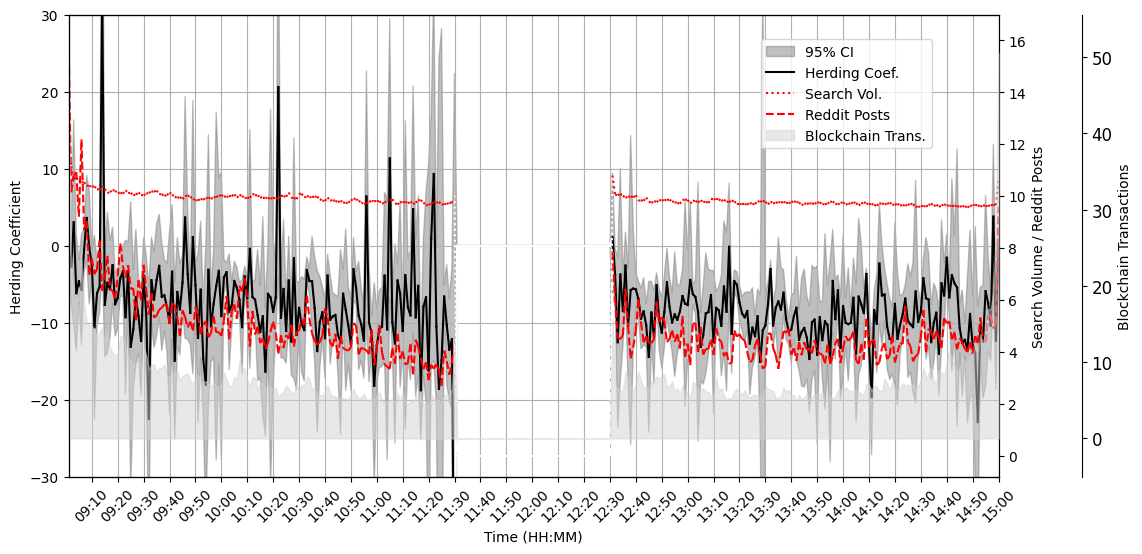

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV file from Google Drive
input_csv = '/content/drive/My Drive/HF/HF_beta.csv'
data = pd.read_csv(input_csv)

# Convert 'Time' to HH:MM format
def convert_time_hhmm(time_value):
    hours = time_value // 10000
    minutes = (time_value % 10000) // 100
    return f"{hours:02}:{minutes:02}"

# Update the time_labels to HH:MM format
time_labels = data['Time'].apply(convert_time_hhmm).values

# Truncate or pad arrays to match the length of the time_labels array (if necessary)
min_length = min(len(time_labels), len(herding_coef), len(conf_lower), len(conf_upper), len(search_vol), len(reddit_posts), len(blockchain_trans))
time_labels = time_labels[:min_length]
herding_coef = herding_coef[:min_length]
conf_lower = conf_lower[:min_length]
conf_upper = conf_upper[:min_length]
search_vol = search_vol[:min_length]
reddit_posts = reddit_posts[:min_length]
blockchain_trans = blockchain_trans[:min_length]

# Convert time_labels to minutes for the 10-minute interval selection
time_minutes = [int(t[:2]) * 60 + int(t[3:5]) for t in time_labels]  # Convert HH:MM to total minutes
time_indices_10min = [i for i, minute in enumerate(time_minutes) if minute % 10 == 0]  # Get indices divisible by 10

# Define the function to plot lines with color change if the value is zero
def plot_with_color_change(ax, time_labels, values, line_color, zero_color='white', label=None, style='-', linewidth=1.5):
    # Loop through the values and plot with the specified colors
    for i in range(len(values) - 1):
        color = line_color if values[i] != 0 and values[i + 1] != 0 else zero_color
        ax.plot(time_labels[i:i+2], values[i:i+2], style, color=color, linewidth=linewidth, label=label if i == 0 else None)

# Create the plot with the modified y-axis limits for herding coefficient and HH:MM time format
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the 95% confidence interval for the herding coefficient
ax1.fill_between(time_labels, conf_lower, conf_upper, color='gray', alpha=0.5, label='95% CI')

# Plot the herding coefficient with color change for zero values
plot_with_color_change(ax1, time_labels, herding_coef, line_color='black', label='Herding Coef.')

# Customize x and y axis labels for the first y-axis
ax1.set_xlabel('Time (HH:MM)')
ax1.set_ylabel('Herding Coefficient')
ax1.set_xlim([0, len(time_labels)-1])
ax1.set_ylim([-35, 35])  # Set the y-axis range for herding coefficient

# Create a second y-axis for the search volume and Reddit posts
ax2 = ax1.twinx()  # Secondary y-axis sharing the same x-axis

# Plot the search volume with color change for zero values
plot_with_color_change(ax2, time_labels, search_vol, line_color='red', style=':', label='Search Vol.')

# Plot Reddit posts with color change for zero values
plot_with_color_change(ax2, time_labels, reddit_posts, line_color='red', style='--', label='Reddit Posts')

# Set y-axis label for the second axis
ax2.set_ylabel('Search Volume / Reddit Posts')

# Create a third axis for blockchain transactions
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to avoid overlap

# Plot blockchain transactions with light gray shaded area
ax3.fill_between(time_labels, blockchain_trans, np.min(blockchain_trans), color='lightgray', alpha=0.5, label='Blockchain Trans.')

# Set y-axis label for the third axis
ax3.set_ylabel('Blockchain Transactions')
ax3.set_ylim([min(blockchain_trans) - 5, max(blockchain_trans) + 5])

# Set x-axis ticks to show only every 10 minutes
ax1.set_xticks(time_labels[time_indices_10min])  # Show only labels at 10 minute intervals
ax1.set_xticklabels([time_labels[i] for i in time_indices_10min], rotation=45)

# Add legends for all axes
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

# Add grid and other visual enhancements
ax1.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Show the plot
plt.show()
#删除网格线

Before the first phase of tick size reduction(T1B)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


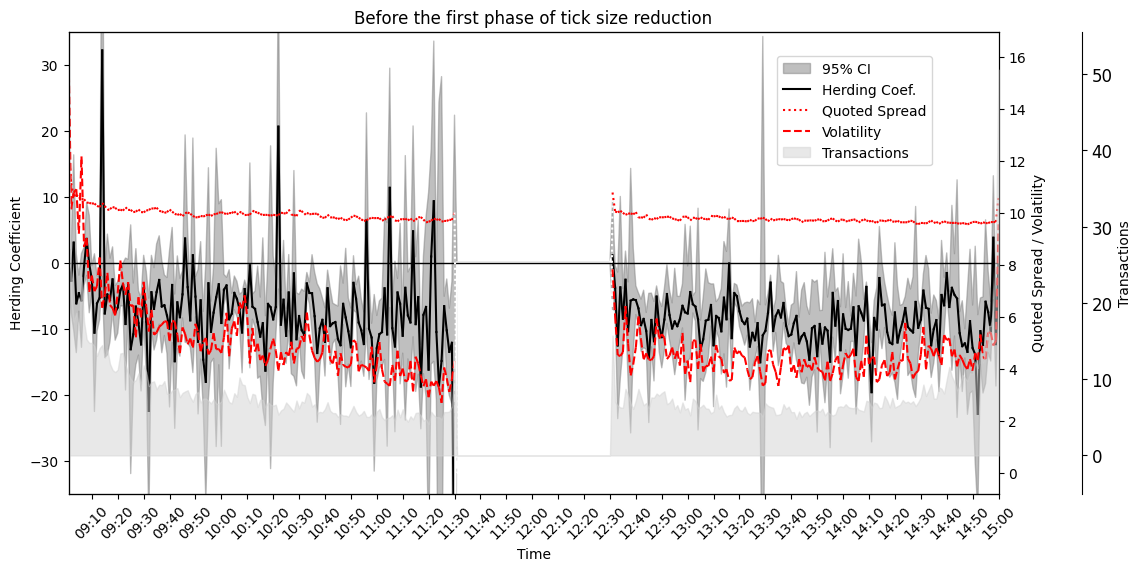

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV file from Google Drive
input_csv = '/content/drive/My Drive/HF/HF_beta.csv'
data = pd.read_csv(input_csv)

# Convert 'Time' to HH:MM format
def convert_time_hhmm(time_value):
    hours = time_value // 10000
    minutes = (time_value % 10000) // 100
    return f"{hours:02}:{minutes:02}"

# Update the time_labels to HH:MM format
time_labels = data['Time'].apply(convert_time_hhmm).values

# Extract relevant data columns
herding_coef = data['Herding Coef.'].values
conf_lower = data['ci_lower'].values
conf_upper = data['ci_upper'].values
search_vol = data['Quoted Spread'].values
reddit_posts = data['Volatility'].values
blockchain_trans = data['Trans.'].values

# Truncate or pad arrays to match the length of the time_labels array (if necessary)
min_length = min(len(time_labels), len(herding_coef), len(conf_lower), len(conf_upper), len(search_vol), len(reddit_posts), len(blockchain_trans))
time_labels = time_labels[:min_length]
herding_coef = herding_coef[:min_length]
conf_lower = conf_lower[:min_length]
conf_upper = conf_upper[:min_length]
search_vol = search_vol[:min_length]
reddit_posts = reddit_posts[:min_length]
blockchain_trans = blockchain_trans[:min_length]

# Convert time_labels to minutes for the 10-minute interval selection
time_minutes = [int(t[:2]) * 60 + int(t[3:5]) for t in time_labels]  # Convert HH:MM to total minutes
time_indices_10min = [i for i, minute in enumerate(time_minutes) if minute % 10 == 0]  # Get indices divisible by 10

# Define the function to plot lines with color change if the value is zero
def plot_with_color_change(ax, time_labels, values, line_color, zero_color='white', label=None, style='-', linewidth=1.5):
    # Loop through the values and plot with the specified colors
    for i in range(len(values) - 1):
        color = line_color if values[i] != 0 and values[i + 1] != 0 else zero_color
        ax.plot(time_labels[i:i+2], values[i:i+2], style, color=color, linewidth=linewidth, label=label if i == 0 else None)

# Create the plot with the modified y-axis limits for herding coefficient and HH:MM time format, removing the grid

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the 95% confidence interval for the herding coefficient
ax1.fill_between(time_labels, conf_lower, conf_upper, color='gray', alpha=0.5, label='95% CI')

# Plot the herding coefficient with color change for zero values
plot_with_color_change(ax1, time_labels, herding_coef, line_color='black', label='Herding Coef.')

# Customize x and y axis labels for the first y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Herding Coefficient')
ax1.set_xlim([0, len(time_labels)-1])
ax1.set_ylim([-35, 35])  # Set the y-axis range for herding coefficient

# Add a horizontal line at y=0 for the Herding Coefficient
ax1.axhline(0, color='black', linewidth=1)

# Create a second y-axis for the search volume and Reddit posts
ax2 = ax1.twinx()  # Secondary y-axis sharing the same x-axis

# Plot the search volume with color change for zero values
plot_with_color_change(ax2, time_labels, search_vol, line_color='red', style=':', label='Quoted Spread')

# Plot Reddit posts with color change for zero values
plot_with_color_change(ax2, time_labels, reddit_posts, line_color='red', style='--', label='Volatility')

# Set y-axis label for the second axis
ax2.set_ylabel('Quoted Spread / Volatility')

# Create a third axis for blockchain transactions
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to avoid overlap

# Plot blockchain transactions with light gray shaded area
ax3.fill_between(time_labels, blockchain_trans, np.min(blockchain_trans), color='lightgray', alpha=0.5, label='Transactions')

# Set y-axis label for the third axis
ax3.set_ylabel('Transactions')
ax3.set_ylim([min(blockchain_trans) - 5, max(blockchain_trans) + 5])

# Set x-axis ticks to show only every 10 minutes
ax1.set_xticks(time_labels[time_indices_10min])  # Show only labels at 10 minute intervals
ax1.set_xticklabels([time_labels[i] for i in time_indices_10min], rotation=45)

# Add title to the plot
plt.title("Before the first phase of tick size reduction")

# Add legends for all axes
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

# Remove grid lines but keep the x-axis and herding coefficient zero line
ax1.grid(False)  # Remove grid lines

# Customize x-axis and y-axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Show the plot
plt.show()




Before the first phase of tick size reduction(T1A)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


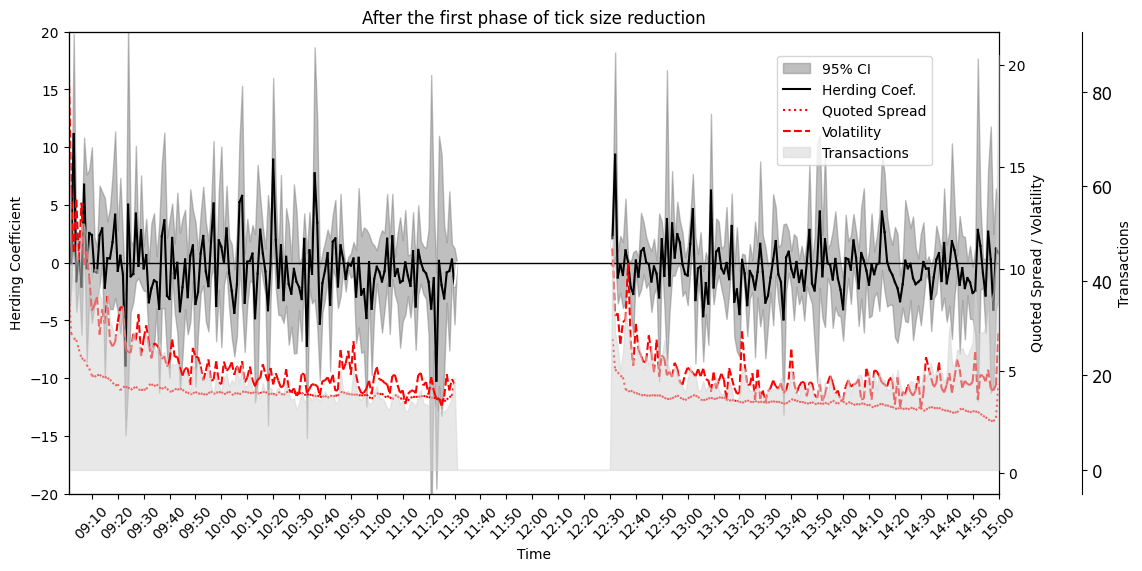

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV file from Google Drive
input_csv = '/content/drive/My Drive/HF/Herdbeta_T1A.csv'
data = pd.read_csv(input_csv)

# Convert 'Time' to HH:MM format
def convert_time_hhmm(time_value):
    hours = time_value // 10000
    minutes = (time_value % 10000) // 100
    return f"{hours:02}:{minutes:02}"

# Update the time_labels to HH:MM format
time_labels = data['Time'].apply(convert_time_hhmm).values

# Extract relevant data columns
herding_coef = data['Herding Coef.'].values
conf_lower = data['ci_lower'].values
conf_upper = data['ci_upper'].values
search_vol = data['Quoted Spread'].values
reddit_posts = data['Volatility'].values
blockchain_trans = data['Transactions'].values

# Truncate or pad arrays to match the length of the time_labels array (if necessary)
min_length = min(len(time_labels), len(herding_coef), len(conf_lower), len(conf_upper), len(search_vol), len(reddit_posts), len(blockchain_trans))
time_labels = time_labels[:min_length]
herding_coef = herding_coef[:min_length]
conf_lower = conf_lower[:min_length]
conf_upper = conf_upper[:min_length]
search_vol = search_vol[:min_length]
reddit_posts = reddit_posts[:min_length]
blockchain_trans = blockchain_trans[:min_length]

# Convert time_labels to minutes for the 10-minute interval selection
time_minutes = [int(t[:2]) * 60 + int(t[3:5]) for t in time_labels]  # Convert HH:MM to total minutes
time_indices_10min = [i for i, minute in enumerate(time_minutes) if minute % 10 == 0]  # Get indices divisible by 10

# Define the function to plot lines with color change if the value is zero
def plot_with_color_change(ax, time_labels, values, line_color, zero_color='white', label=None, style='-', linewidth=1.5):
    # Loop through the values and plot with the specified colors
    for i in range(len(values) - 1):
        color = line_color if values[i] != 0 and values[i + 1] != 0 else zero_color
        ax.plot(time_labels[i:i+2], values[i:i+2], style, color=color, linewidth=linewidth, label=label if i == 0 else None)

# Create the plot with the modified y-axis limits for herding coefficient and HH:MM time format, removing the grid

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the 95% confidence interval for the herding coefficient
ax1.fill_between(time_labels, conf_lower, conf_upper, color='gray', alpha=0.5, label='95% CI')

# Plot the herding coefficient with color change for zero values
plot_with_color_change(ax1, time_labels, herding_coef, line_color='black', label='Herding Coef.')

# Customize x and y axis labels for the first y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Herding Coefficient')
ax1.set_xlim([0, len(time_labels)-1])
ax1.set_ylim([-20, 20])  # Set the y-axis range for herding coefficient

# Add a horizontal line at y=0 for the Herding Coefficient
ax1.axhline(0, color='black', linewidth=1)

# Create a second y-axis for the search volume and Reddit posts
ax2 = ax1.twinx()  # Secondary y-axis sharing the same x-axis

# Plot the search volume with color change for zero values
plot_with_color_change(ax2, time_labels, search_vol, line_color='red', style=':', label='Quoted Spread')

# Plot Reddit posts with color change for zero values
plot_with_color_change(ax2, time_labels, reddit_posts, line_color='red', style='--', label='Volatility')

# Set y-axis label for the second axis
ax2.set_ylabel('Quoted Spread / Volatility')

# Create a third axis for blockchain transactions
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to avoid overlap

# Plot blockchain transactions with light gray shaded area
ax3.fill_between(time_labels, blockchain_trans, np.min(blockchain_trans), color='lightgray', alpha=0.5, label='Transactions')

# Set y-axis label for the third axis
ax3.set_ylabel('Transactions')
ax3.set_ylim([min(blockchain_trans) - 5, max(blockchain_trans) + 5])

# Set x-axis ticks to show only every 10 minutes
ax1.set_xticks(time_labels[time_indices_10min])  # Show only labels at 10 minute intervals
ax1.set_xticklabels([time_labels[i] for i in time_indices_10min], rotation=45)

# Add title to the plot
plt.title("After the first phase of tick size reduction")

# Add legends for all axes
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

# Remove grid lines but keep the x-axis and herding coefficient zero line
ax1.grid(False)  # Remove grid lines

# Customize x-axis and y-axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

Before the second phase of tick size reduction(TB2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


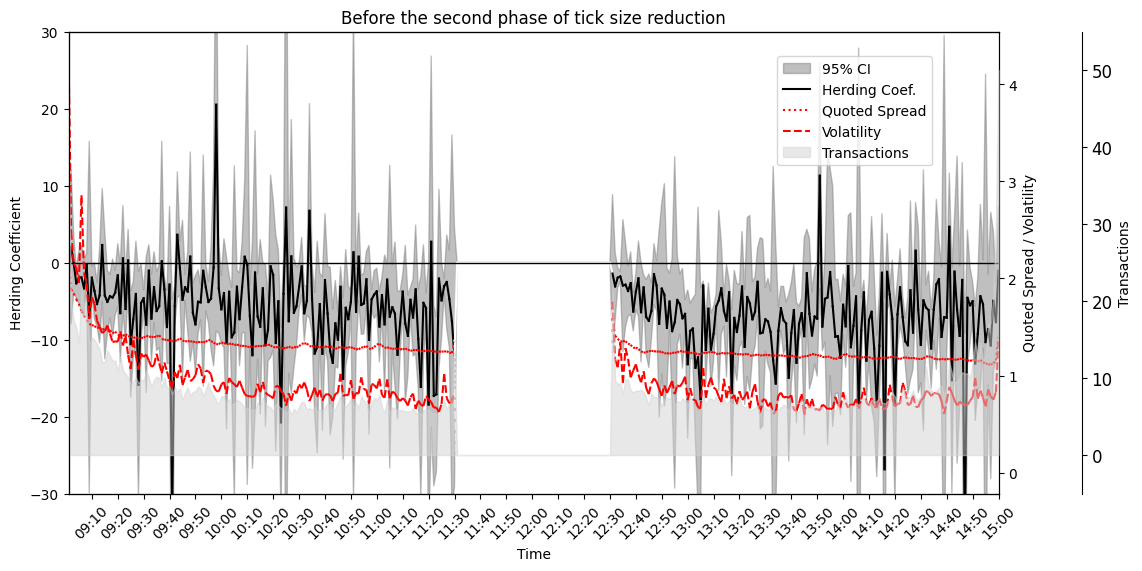

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV file from Google Drive
input_csv = '/content/drive/My Drive/HF/Herdbeta_T2B.csv'
data = pd.read_csv(input_csv)

# Convert 'Time' to HH:MM format
def convert_time_hhmm(time_value):
    hours = time_value // 10000
    minutes = (time_value % 10000) // 100
    return f"{hours:02}:{minutes:02}"

# Update the time_labels to HH:MM format
time_labels = data['Time'].apply(convert_time_hhmm).values

# Extract relevant data columns
herding_coef = data['Herding Coef.'].values
conf_lower = data['ci_lower'].values
conf_upper = data['ci_upper'].values
search_vol = data['Quoted Spread'].values
reddit_posts = data['Volatility'].values
blockchain_trans = data['Transactions'].values

# Truncate or pad arrays to match the length of the time_labels array (if necessary)
min_length = min(len(time_labels), len(herding_coef), len(conf_lower), len(conf_upper), len(search_vol), len(reddit_posts), len(blockchain_trans))
time_labels = time_labels[:min_length]
herding_coef = herding_coef[:min_length]
conf_lower = conf_lower[:min_length]
conf_upper = conf_upper[:min_length]
search_vol = search_vol[:min_length]
reddit_posts = reddit_posts[:min_length]
blockchain_trans = blockchain_trans[:min_length]

# Convert time_labels to minutes for the 10-minute interval selection
time_minutes = [int(t[:2]) * 60 + int(t[3:5]) for t in time_labels]  # Convert HH:MM to total minutes
time_indices_10min = [i for i, minute in enumerate(time_minutes) if minute % 10 == 0]  # Get indices divisible by 10

# Define the function to plot lines with color change if the value is zero
def plot_with_color_change(ax, time_labels, values, line_color, zero_color='white', label=None, style='-', linewidth=1.5):
    # Loop through the values and plot with the specified colors
    for i in range(len(values) - 1):
        color = line_color if values[i] != 0 and values[i + 1] != 0 else zero_color
        ax.plot(time_labels[i:i+2], values[i:i+2], style, color=color, linewidth=linewidth, label=label if i == 0 else None)

# Create the plot with the modified y-axis limits for herding coefficient and HH:MM time format, removing the grid

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the 95% confidence interval for the herding coefficient
ax1.fill_between(time_labels, conf_lower, conf_upper, color='gray', alpha=0.5, label='95% CI')

# Plot the herding coefficient with color change for zero values
plot_with_color_change(ax1, time_labels, herding_coef, line_color='black', label='Herding Coef.')

# Customize x and y axis labels for the first y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Herding Coefficient')
ax1.set_xlim([0, len(time_labels)-1])
ax1.set_ylim([-30, 30])  # Set the y-axis range for herding coefficient

# Add a horizontal line at y=0 for the Herding Coefficient
ax1.axhline(0, color='black', linewidth=1)

# Create a second y-axis for the search volume and Reddit posts
ax2 = ax1.twinx()  # Secondary y-axis sharing the same x-axis

# Plot the search volume with color change for zero values
plot_with_color_change(ax2, time_labels, search_vol, line_color='red', style=':', label='Quoted Spread')

# Plot Reddit posts with color change for zero values
plot_with_color_change(ax2, time_labels, reddit_posts, line_color='red', style='--', label='Volatility')

# Set y-axis label for the second axis
ax2.set_ylabel('Quoted Spread / Volatility')

# Create a third axis for blockchain transactions
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to avoid overlap

# Plot blockchain transactions with light gray shaded area
ax3.fill_between(time_labels, blockchain_trans, np.min(blockchain_trans), color='lightgray', alpha=0.5, label='Transactions')

# Set y-axis label for the third axis
ax3.set_ylabel('Transactions')
ax3.set_ylim([min(blockchain_trans) - 5, max(blockchain_trans) + 5])

# Set x-axis ticks to show only every 10 minutes
ax1.set_xticks(time_labels[time_indices_10min])  # Show only labels at 10 minute intervals
ax1.set_xticklabels([time_labels[i] for i in time_indices_10min], rotation=45)

# Add title to the plot
plt.title("Before the second phase of tick size reduction")

# Add legends for all axes
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

# Remove grid lines but keep the x-axis and herding coefficient zero line
ax1.grid(False)  # Remove grid lines

# Customize x-axis and y-axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

After the second phase of tick size reduction(TA2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


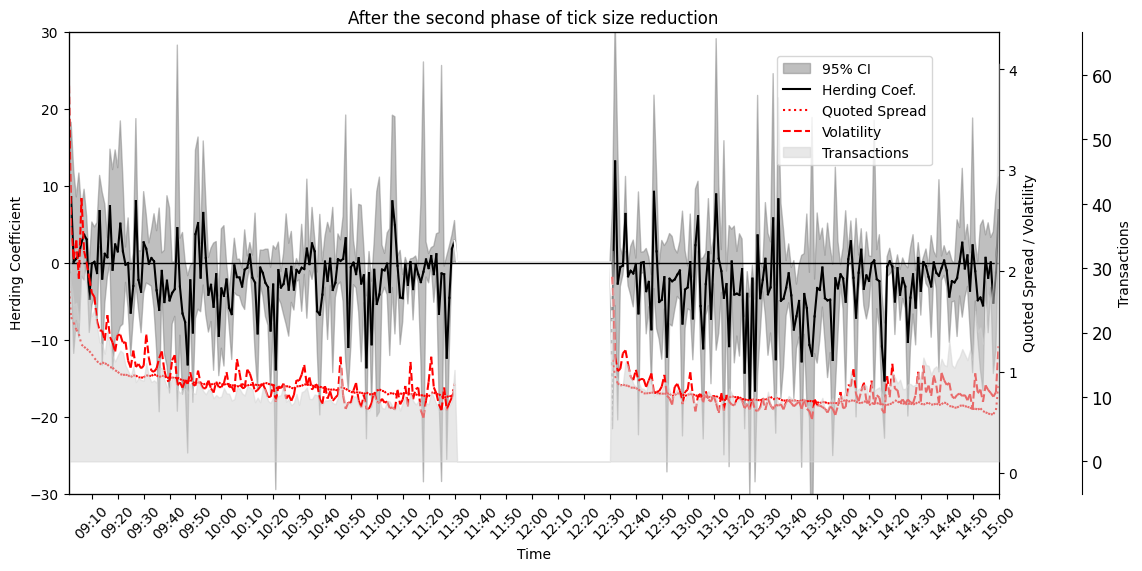

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV file from Google Drive
input_csv = '/content/drive/My Drive/HF/Herdbeta_T2A.csv'
data = pd.read_csv(input_csv)

# Convert 'Time' to HH:MM format
def convert_time_hhmm(time_value):
    hours = time_value // 10000
    minutes = (time_value % 10000) // 100
    return f"{hours:02}:{minutes:02}"

# Update the time_labels to HH:MM format
time_labels = data['Time'].apply(convert_time_hhmm).values

# Extract relevant data columns
herding_coef = data['Herding Coef.'].values
conf_lower = data['ci_lower'].values
conf_upper = data['ci_upper'].values
search_vol = data['Quoted Spread'].values
reddit_posts = data['Volatility'].values
blockchain_trans = data['Transactions'].values

# Truncate or pad arrays to match the length of the time_labels array (if necessary)
min_length = min(len(time_labels), len(herding_coef), len(conf_lower), len(conf_upper), len(search_vol), len(reddit_posts), len(blockchain_trans))
time_labels = time_labels[:min_length]
herding_coef = herding_coef[:min_length]
conf_lower = conf_lower[:min_length]
conf_upper = conf_upper[:min_length]
search_vol = search_vol[:min_length]
reddit_posts = reddit_posts[:min_length]
blockchain_trans = blockchain_trans[:min_length]

# Convert time_labels to minutes for the 10-minute interval selection
time_minutes = [int(t[:2]) * 60 + int(t[3:5]) for t in time_labels]  # Convert HH:MM to total minutes
time_indices_10min = [i for i, minute in enumerate(time_minutes) if minute % 10 == 0]  # Get indices divisible by 10

# Define the function to plot lines with color change if the value is zero
def plot_with_color_change(ax, time_labels, values, line_color, zero_color='white', label=None, style='-', linewidth=1.5):
    # Loop through the values and plot with the specified colors
    for i in range(len(values) - 1):
        color = line_color if values[i] != 0 and values[i + 1] != 0 else zero_color
        ax.plot(time_labels[i:i+2], values[i:i+2], style, color=color, linewidth=linewidth, label=label if i == 0 else None)

# Create the plot with the modified y-axis limits for herding coefficient and HH:MM time format, removing the grid

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the 95% confidence interval for the herding coefficient
ax1.fill_between(time_labels, conf_lower, conf_upper, color='gray', alpha=0.5, label='95% CI')

# Plot the herding coefficient with color change for zero values
plot_with_color_change(ax1, time_labels, herding_coef, line_color='black', label='Herding Coef.')

# Customize x and y axis labels for the first y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Herding Coefficient')
ax1.set_xlim([0, len(time_labels)-1])
ax1.set_ylim([-30, 30])  # Set the y-axis range for herding coefficient

# Add a horizontal line at y=0 for the Herding Coefficient
ax1.axhline(0, color='black', linewidth=1)

# Create a second y-axis for the search volume and Reddit posts
ax2 = ax1.twinx()  # Secondary y-axis sharing the same x-axis

# Plot the search volume with color change for zero values
plot_with_color_change(ax2, time_labels, search_vol, line_color='red', style=':', label='Quoted Spread')

# Plot Reddit posts with color change for zero values
plot_with_color_change(ax2, time_labels, reddit_posts, line_color='red', style='--', label='Volatility')

# Set y-axis label for the second axis
ax2.set_ylabel('Quoted Spread / Volatility')

# Create a third axis for blockchain transactions
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to avoid overlap

# Plot blockchain transactions with light gray shaded area
ax3.fill_between(time_labels, blockchain_trans, np.min(blockchain_trans), color='lightgray', alpha=0.5, label='Transactions')

# Set y-axis label for the third axis
ax3.set_ylabel('Transactions')
ax3.set_ylim([min(blockchain_trans) - 5, max(blockchain_trans) + 5])

# Set x-axis ticks to show only every 10 minutes
ax1.set_xticks(time_labels[time_indices_10min])  # Show only labels at 10 minute intervals
ax1.set_xticklabels([time_labels[i] for i in time_indices_10min], rotation=45)

# Add title to the plot
plt.title("After the second phase of tick size reduction")

# Add legends for all axes
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

# Remove grid lines but keep the x-axis and herding coefficient zero line
ax1.grid(False)  # Remove grid lines

# Customize x-axis and y-axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Show the plot
plt.show()